Primero se importará la información de la base de datos de la nasa para analizar.

In [4]:
import pandas as pd

df = pd.read_csv("A1.3 NASA.csv")

print(df.shape, "\n")
print(df.columns, "\n")
print(df.head(15))

(1503, 6) 

Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object') 

    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       

In [5]:
train = df.sample(frac = 0.7)
test = df.drop(train.index)

print("Suma de datos: ",1052+451, "\n")
print("Datos originales: ", 1503, "\n")
print("Train", train.shape, "\n")
print("Test", test.shape, "\n")
print(train.head())

Suma de datos:  1503 

Datos originales:  1503 

Train (1052, 6) 

Test (451, 6) 

      frecuencia  angulo  longitud  velocidad   espesor  presion
600          800     7.2    0.1524       71.3  0.007520  136.023
292         1600     2.0    0.2286       31.7  0.003724  125.797
1044         500     4.8    0.0254       31.7  0.000931  116.128
972         2000     0.0    0.0254       55.5  0.000412  127.623
975         4000     0.0    0.0254       55.5  0.000412  133.223


In [7]:
import statsmodels.api as sm

x = train.drop("presion", axis = 1)
y = train.presion

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.summary(), "\n\n---------------------------\n")
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     219.2
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          5.19e-160
Time:                        07:37:52   Log-Likelihood:                -3151.9
No. Observations:                1052   AIC:                             6316.
Df Residuals:                    1046   BIC:                             6346.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.3279      0.658    201.023      0.0

Analizando los datos estadísticos obtenidos del modelo generado, podemos notar dos cosas principales.
La primera es que todas las variables tienen un valor p < 0.05, por lo que podemos decir que hay suficiente evidencia estadística para afirmar una relación significativa entre las variables. Por otra parte, la segunda es que, al analizar los estadísticos t de cada una de las variables, podemos observar que la que tiene el mayor valor absoluto es la frecuencia, con lo que puede considerarse de las variables más fuertes del modelo.

In [11]:
import numpy as np

RSE_train = np.sqrt(results.scale)
R2_train = results.rsquared

print("-Datos de entrenamiento-")
print("RSE =", RSE_train)
print("R^2 =", R2_train)

XTest = test.drop('presion', axis = 1)
yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.presion
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
RSETest = np.sqrt(RSSTest/(nTest-mTest-1))
R2Test = 1 - RSSTest / TSSTest
print("\n-Datos de validacion-")
print("RSE =", RSETest)
print("R^2 =", R2Test)

-Datos de entrenamiento-
RSE = 4.855034111239331
R^2 = 0.5116743503406544

-Datos de validacion-
RSE = 4.766439756044246
R^2 = 0.5183961707490186


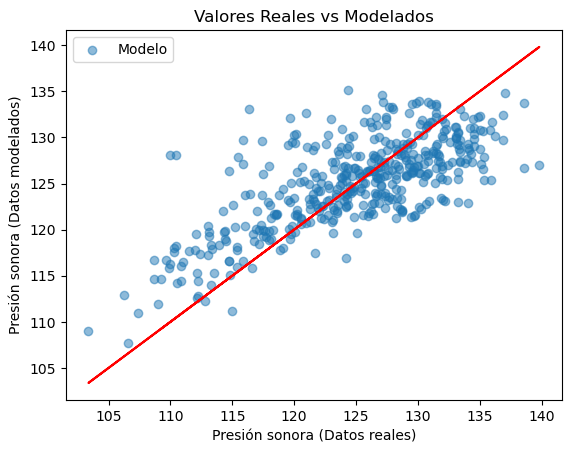

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(YTest, yhatTest, alpha=0.5, label='Modelo')
plt.plot(YTest,YTest, c = 'r') 
plt.xlabel("Presión sonora (Datos reales)")
plt.ylabel("Presión sonora (Datos modelados)")
plt.title("Valores Reales vs Modelados")
plt.legend()
plt.show()